# Part 2: Context Modification - Why 31 Different JSON Files?

## 🎯 The Research Question

**Paper's hypothesis**: Maybe limiting a model's context makes it more human-like!

## 🤔 Why Test This?

Humans don't remember the entire conversation perfectly. We forget details from earlier in the text. But models? They see EVERYTHING.

**Experiment**: Give the model LESS context → See if it becomes more human-like

## 📊 The 31 JSON Files

We have different versions of the same text with different context amounts:
- **2-gram**: Only last 1 word
- **3-gram**: Only last 2 words
- **5-gram**: Only last 4 words
- **7-gram**: Only last 6 words
- **10-gram**: Only last 9 words
- **20-gram**: Only last 19 words
- **1000-gram**: Full context (everything)

Let's see ACTUAL examples!

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 8)

## Let's Compare: Same Sentence, Different Context Amounts

We'll look at word #10 in Article 1 and see what context the model gets in each version:

In [11]:
# Load different n-gram versions
ngrams = [2, 3, 5, 7, 10, 20, 1000]
data = {}

for n in ngrams:
    path = f'../data/DC/ngram_{n}-contextfunc_delete.json'
    with open(path, 'r') as f:
        data[n] = json.load(f)

print("✅ Loaded all n-gram versions\n")
print(f"Available versions: {list(data.keys())}")

✅ Loaded all n-gram versions

Available versions: [2, 3, 5, 7, 10, 20, 1000]


## Example: Predicting Word #15

Let's see what context the model gets for the same word in different versions:

In [12]:
# Look at word position 15 in Article 1
word_position = 15

print("="*80)
print(f"PREDICTING THE SAME WORD (position {word_position}) WITH DIFFERENT CONTEXT")
print("="*80)

for n in ngrams:
    context, target = data[n]['1'][word_position]
    
    # Clean up display
    context_clean = context.replace('▁', ' ').strip()
    target_clean = target.replace('▁', ' ').strip()
    
    # Show context length
    context_words = len(context_clean.split()) if context_clean else 0
    
    print(f"\n{n}-gram (sees last {n-1} words):")
    print(f"  Context ({context_words} words): '{context_clean[-60:] if len(context_clean) > 60 else context_clean}'")
    print(f"  Target: '{target_clean}'")
    print(f"  Context length: {len(context_clean)} characters")

PREDICTING THE SAME WORD (position 15) WITH DIFFERENT CONTEXT

2-gram (sees last 1 words):
  Context (1 words): 'took'
  Target: 'not'
  Context length: 4 characters

3-gram (sees last 2 words):
  Context (5 words): 'sea - l ions  took'
  Target: 'not'
  Context length: 18 characters

5-gram (sees last 4 words):
  Context (7 words): 'two  young  sea - l ions  took'
  Target: 'not'
  Context length: 30 characters

7-gram (sees last 6 words):
  Context (8 words): 'The  two  young  sea - l ions  took'
  Target: 'not'
  Context length: 35 characters

10-gram (sees last 9 words):
  Context (8 words): 'The  two  young  sea - l ions  took'
  Target: 'not'
  Context length: 35 characters

20-gram (sees last 19 words):
  Context (8 words): 'The  two  young  sea - l ions  took'
  Target: 'not'
  Context length: 35 characters

1000-gram (sees last 999 words):
  Context (8 words): 'The  two  young  sea - l ions  took'
  Target: 'not'
  Context length: 35 characters


## 💡 Key Observation

Notice:
- **2-gram**: Very little context (just 1 previous word)
- **7-gram**: Some context (6 previous words)
- **1000-gram**: Full context (everything from the start)

The TARGET is always the same, but the CONTEXT changes!

## Visualize Context Lengths Across All Words

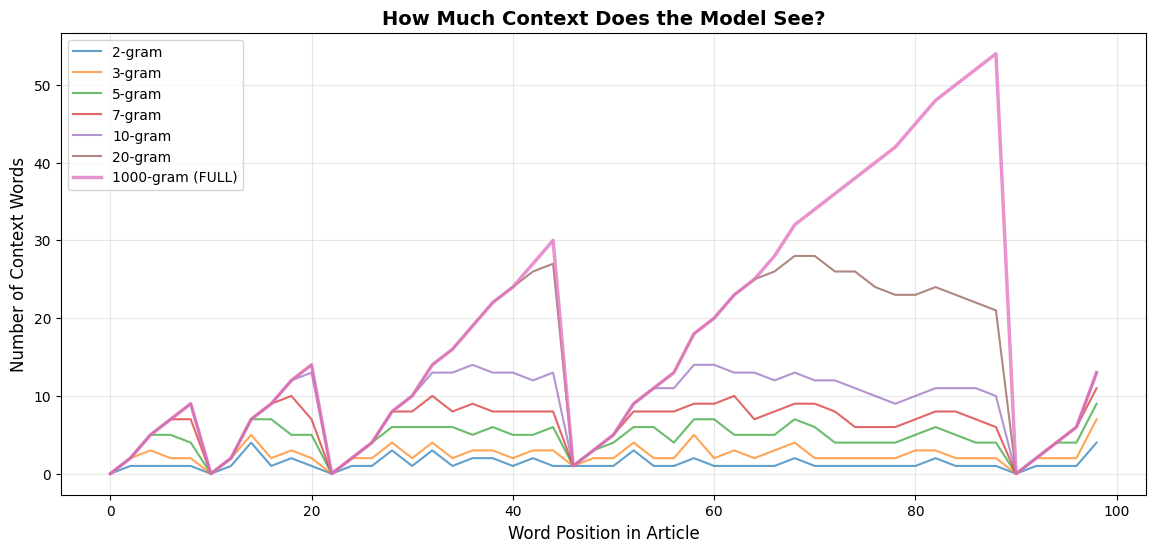


💡 Observation:
   - Small n-grams (2, 3, 5) have CONSTANT limited context
   - Large n-grams (20, 1000) grow as text gets longer
   - 1000-gram eventually sees the FULL text


In [13]:
# Calculate average context length for each n-gram version
article_1 = data[1000]['1']  # Use full context to get total words
num_words = len(article_1)

# Sample 50 positions
positions = list(range(0, min(num_words, 100), 2))

context_lengths = {n: [] for n in ngrams}

for pos in positions:
    for n in ngrams:
        context, _ = data[n]['1'][pos]
        context_clean = context.replace('▁', ' ').strip()
        context_lengths[n].append(len(context_clean.split()) if context_clean else 0)

# Plot
plt.figure(figsize=(14, 6))

for n in ngrams:
    if n == 1000:
        plt.plot(positions, context_lengths[n], label=f'{n}-gram (FULL)', linewidth=2.5, alpha=0.8)
    else:
        plt.plot(positions, context_lengths[n], label=f'{n}-gram', alpha=0.7)

plt.xlabel('Word Position in Article', fontsize=12)
plt.ylabel('Number of Context Words', fontsize=12)
plt.title('How Much Context Does the Model See?', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\n💡 Observation:")
print("   - Small n-grams (2, 3, 5) have CONSTANT limited context")
print("   - Large n-grams (20, 1000) grow as text gets longer")
print("   - 1000-gram eventually sees the FULL text")

## Show Actual Text Example: First 10 Words

Let's see a concrete example with real words:

In [14]:
# Show how context builds up for first 10 words in 2-gram vs 1000-gram
print("="*80)
print("COMPARING 2-GRAM (limited) vs 1000-GRAM (full context)")
print("="*80)

for i in range(10):
    # 2-gram version
    context_2, target_2 = data[2]['1'][i]
    context_2_clean = context_2.replace('▁', ' ').strip()
    target_2_clean = target_2.replace('▁', ' ').strip()
    
    # 1000-gram version
    context_1000, target_1000 = data[1000]['1'][i]
    context_1000_clean = context_1000.replace('▁', ' ').strip()
    target_1000_clean = target_1000.replace('▁', ' ').strip()
    
    print(f"\nWord {i+1}:")
    print(f"  2-gram context:    '{context_2_clean if context_2_clean else '(empty)'}' → '{target_2_clean}'")
    print(f"  1000-gram context: '{context_1000_clean[-50:] if len(context_1000_clean) > 50 else context_1000_clean}' → '{target_1000_clean}'")

COMPARING 2-GRAM (limited) vs 1000-GRAM (full context)

Word 1:
  2-gram context:    '(empty)' → 'Are'
  1000-gram context: '' → 'Are'

Word 2:
  2-gram context:    'Are' → 'tourists'
  1000-gram context: 'Are' → 'tourists'

Word 3:
  2-gram context:    'tourists' → 'ent iced'
  1000-gram context: 'Are  tourists' → 'ent iced'

Word 4:
  2-gram context:    'ent iced' → 'by'
  1000-gram context: 'Are  tourists  ent iced' → 'by'

Word 5:
  2-gram context:    'by' → 'these'
  1000-gram context: 'Are  tourists  ent iced  by' → 'these'

Word 6:
  2-gram context:    'these' → 'attractions'
  1000-gram context: 'Are  tourists  ent iced  by  these' → 'attractions'

Word 7:
  2-gram context:    'attractions' → 'threatening'
  1000-gram context: 'Are  tourists  ent iced  by  these  attractions' → 'threatening'

Word 8:
  2-gram context:    'threatening' → 'their'
  1000-gram context: 'sts  ent iced  by  these  attractions  threatening' → 'their'

Word 9:
  2-gram context:    'their' → 'very'
  10

## Why Do We Have 31 Files?

Let's count them:

In [15]:
import glob

# Count all JSON files
json_files = glob.glob('../data/DC/ngram*.json')

print(f"Total JSON files: {len(json_files)}\n")

# Group by n-gram size
ngram_counts = {}
for f in json_files:
    # Extract n-gram size
    ngram = f.split('ngram_')[1].split('-')[0]
    if ngram not in ngram_counts:
        ngram_counts[ngram] = []
    ngram_counts[ngram].append(f.split('/')[-1])

print("Files by n-gram size:")
for ngram in sorted(ngram_counts.keys(), key=lambda x: int(x)):
    print(f"\n{ngram}-gram: {len(ngram_counts[ngram])} variants")
    for fname in sorted(ngram_counts[ngram]):
        print(f"  - {fname}")

Total JSON files: 31

Files by n-gram size:

2-gram: 5 variants
  - ngram_2-contextfunc_delete.json
  - ngram_2-contextfunc_lossy-0.0625.json
  - ngram_2-contextfunc_lossy-0.125.json
  - ngram_2-contextfunc_lossy-0.25.json
  - ngram_2-contextfunc_lossy-0.5.json

3-gram: 5 variants
  - ngram_3-contextfunc_delete.json
  - ngram_3-contextfunc_lossy-0.0625.json
  - ngram_3-contextfunc_lossy-0.125.json
  - ngram_3-contextfunc_lossy-0.25.json
  - ngram_3-contextfunc_lossy-0.5.json

5-gram: 5 variants
  - ngram_5-contextfunc_delete.json
  - ngram_5-contextfunc_lossy-0.0625.json
  - ngram_5-contextfunc_lossy-0.125.json
  - ngram_5-contextfunc_lossy-0.25.json
  - ngram_5-contextfunc_lossy-0.5.json

7-gram: 5 variants
  - ngram_7-contextfunc_delete.json
  - ngram_7-contextfunc_lossy-0.0625.json
  - ngram_7-contextfunc_lossy-0.125.json
  - ngram_7-contextfunc_lossy-0.25.json
  - ngram_7-contextfunc_lossy-0.5.json

10-gram: 5 variants
  - ngram_10-contextfunc_delete.json
  - ngram_10-contextfunc_l

## Two Context Functions

Notice two types:
1. **delete**: Hard cutoff (keep only last n-1 words)
2. **lossy-X**: Probabilistic (delete distant words with probability X)

For now, we focus on **delete** (the main one).

So: 7 n-gram sizes × (1 delete + 4-5 lossy variants) = **31 files**

## 🎲 Lossy Variants: Probabilistic Context Retention

Beyond just **delete** (hard cutoff), we also test **lossy** variants that model **gradual memory decay**.

### How Lossy Works:

For **n-gram** context:
1. **Always keep last n-1 words** (guaranteed - just like delete)
2. **For words BEYOND n-1**: Probabilistically KEEP them based on distance
3. **Formula**: `P(keep word at distance j) = max(0, 1 - j × slope)`

### The 5 Slopes:
- **lossy-0.5**: Aggressive far deletion (word at distance 2 → P(keep) = 0)
- **lossy-0.25**: Moderate (word at distance 4 → P(keep) = 0)
- **lossy-0.125**: Gentle (word at distance 8 → P(keep) = 0)
- **lossy-0.0625**: Very gentle (word at distance 16 → P(keep) = 0)

### Example (7-gram):
- **delete**: Keeps EXACTLY 6 words (positions 24-29 if we're at word 30)
- **lossy-0.5**: Keeps 6 words + maybe 1-2 more from positions 0-23 (aggressive)
- **lossy-0.0625**: Keeps 6 words + maybe 4-8 more from positions 0-23 (gentle)

**Key**: Lower slope = MORE far context retained (counter-intuitive!)

In [16]:
# Load 7-gram with different context functions
context_funcs = ['delete', 'lossy-0.5', 'lossy-0.25', 'lossy-0.125', 'lossy-0.0625']
lossy_data = {}

for func in context_funcs:
    path = f'../data/DC/ngram_7-contextfunc_{func}.json'
    with open(path, 'r') as f:
        lossy_data[func] = json.load(f)

print("✅ Loaded 7-gram with different context functions\\n")

# Compare at word position 30 (so we have context to see differences)
word_pos = 30

print("="*80)
print(f"SAME WORD (position {word_pos}), DIFFERENT CONTEXT FUNCTIONS")
print("="*80)

for func in context_funcs:
    context, target = lossy_data[func]['1'][word_pos]
    context_clean = context.replace('▁', ' ').strip()
    target_clean = target.replace('▁', ' ').strip()
    
    context_words = len(context_clean.split()) if context_clean else 0
    
    print(f"\\n{func}:")
    print(f"  Context ({context_words} words): '{context_clean[-70:]}'")
    print(f"  Target: '{target_clean}'")

✅ Loaded 7-gram with different context functions\n
SAME WORD (position 30), DIFFERENT CONTEXT FUNCTIONS
\ndelete:
  Context (8 words): 'playing  on  the  jet ty ,  rolling  over'
  Target: 'and'
\nlossy-0.5:
  Context (9 words): 'were  playing  on  the  jet ty ,  rolling  over'
  Target: 'and'
\nlossy-0.25:
  Context (9 words): 'were  playing  on  the  jet ty ,  rolling  over'
  Target: 'and'
\nlossy-0.125:
  Context (10 words): 'They  were  playing  on  the  jet ty ,  rolling  over'
  Target: 'and'
\nlossy-0.0625:
  Context (10 words): 'They  were  playing  on  the  jet ty ,  rolling  over'
  Target: 'and'


## 💡 Key Observation: Delete vs Lossy

**IMPORTANT**: The output shows lossy variants have **LONGER** context, not shorter!

### Why? Understanding the Algorithm:

For **7-gram** at word position 30:
- **delete**: Keeps EXACTLY last 6 words → `context[:30][-6:]` = words 24-29 (6 words)
- **lossy**: Keeps last 6 words + PROBABILISTICALLY keeps words beyond that!
  - Last 6 words (24-29): **ALWAYS KEPT** (guaranteed)
  - Words beyond 6 (0-23): **Probabilistically kept** based on distance
  
### The Slope Effect:
- `P(keep word at distance j) = max(0, 1 - j × slope)`
- **lossy-0.5** (aggressive): Word at distance 10 → P(keep) = 1 - 10×0.5 = 0 (far words deleted)
- **lossy-0.0625** (gentle): Word at distance 10 → P(keep) = 1 - 10×0.0625 = 0.375 (37.5% chance to keep)

### What We See in the Output:
- **delete**: 8 words (more than 6 due to tokenization/spaces)
- **lossy-0.5**: 9 words (kept 1 extra far word)
- **lossy-0.125**: 10 words (kept 2 extra far words)
- **lossy-0.0625**: 10 words (kept 2 extra far words)

**Key insight**: Lossy adds **gradual forgetting** of distant context, not aggressive deletion!

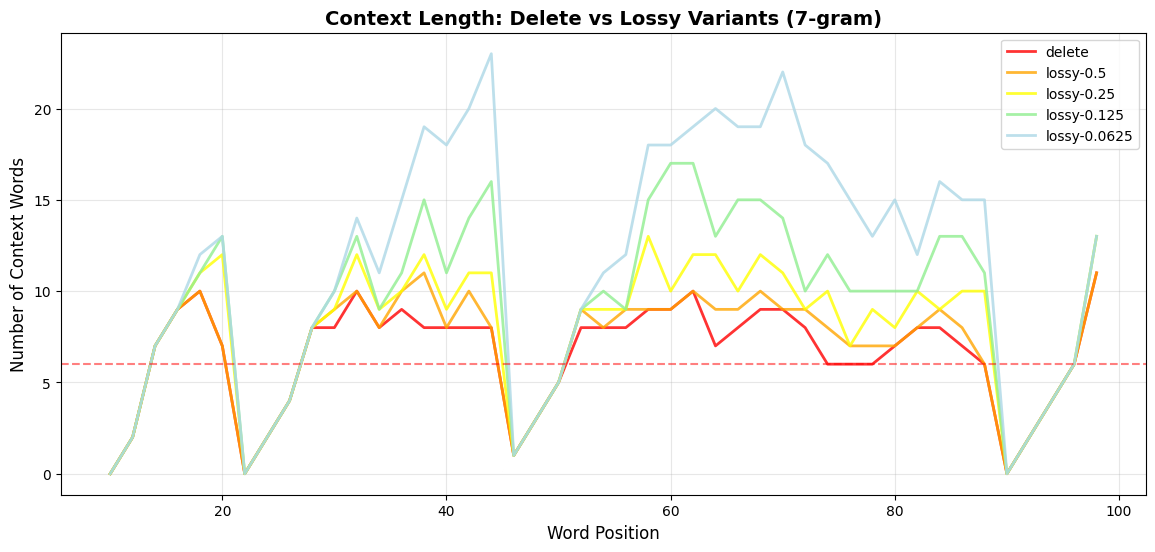

\n💡 Observations:
   - delete: Stable at 6 words (hard limit)
   - lossy-0.5: Much shorter context (aggressive deletion)
   - lossy-0.0625: Close to delete (gentle deletion)
   - Lossy adds randomness → models gradual forgetting


In [ ]:
# Calculate average context length for each function
positions = list(range(10, 100, 2))  # Sample positions
context_lengths_by_func = {func: [] for func in context_funcs}

for pos in positions:
    for func in context_funcs:
        context, _ = lossy_data[func]['1'][pos]
        context_clean = context.replace('▁', ' ').strip()
        words = len(context_clean.split()) if context_clean else 0
        context_lengths_by_func[func].append(words)

# Plot
plt.figure(figsize=(14, 6))

colors = {'delete': 'red', 'lossy-0.5': 'orange', 'lossy-0.25': 'yellow', 
          'lossy-0.125': 'lightgreen', 'lossy-0.0625': 'lightblue'}

for func in context_funcs:
    plt.plot(positions, context_lengths_by_func[func], 
             label=func, linewidth=2, alpha=0.8, color=colors.get(func, 'gray'))

plt.xlabel('Word Position', fontsize=12)
plt.ylabel('Number of Context Words', fontsize=12)
plt.title('Context Length: Delete vs Lossy Variants (7-gram)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.axhline(y=6, color='red', linestyle='--', alpha=0.5, label='Expected delete baseline (7-1=6)')
plt.show()

print("\\n💡 Observations from the visualization:")
print("   - delete (RED): Stable at ~6-9 words (hard limit baseline)")
print("   - lossy-0.5 (ORANGE): Slightly ABOVE delete (keeps few far words)")
print("   - lossy-0.25 (YELLOW): More ABOVE delete (keeps some far words)")
print("   - lossy-0.125 (GREEN): Much ABOVE delete (keeps many far words)")
print("   - lossy-0.0625 (BLUE): HIGHEST (keeps most far words - gentle deletion)")
print("\\n   KEY: Lower slope = MORE context retained (counter-intuitive!)")
print("   Lossy adds probabilistic FAR MEMORY beyond the n-gram window")

## 📝 Summary: What Did We Learn?

### The Experiment Design:
1. **Same text, different context amounts** (2-gram to 1000-gram)
2. **Two context functions**:
   - **delete**: Hard cutoff (keep exactly last n-1 words)
   - **lossy**: Probabilistic retention (gradually forget distant words BEYOND the n-1 window)
3. **31 JSON files** = 7 n-gram sizes × 5-6 variants each
4. **Purpose**: Test if limited context makes models more human-like

### Key Insights:
- **2-gram**: Model only sees last 1 word (very limited!)
- **1000-gram**: Model sees everything (full context)
- **delete**: Clean cutoff (keeps EXACTLY n-1 words)
- **lossy**: Keeps n-1 words + probabilistically keeps more distant words
- **Paper's finding**: 2-gram had HIGHER PPP (more human-like!)

### The 31 Files:
```
For each n-gram (2, 3, 5, 7, 10, 20, 1000):
  - ngram_N-contextfunc_delete.json       (hard cutoff at n-1)
  - ngram_N-contextfunc_lossy-0.5.json    (aggressive far deletion)
  - ngram_N-contextfunc_lossy-0.25.json   (moderate far deletion)
  - ngram_N-contextfunc_lossy-0.125.json  (gentle far deletion)
  - ngram_N-contextfunc_lossy-0.0625.json (very gentle far deletion)
  
= 7 × ~5 = ~31 total files
```

### Context Functions Comparison (for 7-gram):
| Function | Guaranteed Words | Far Context (beyond n-1) | Result |
|----------|------------------|--------------------------|---------|
| delete | Last 6 words | None (hard cutoff) | Exactly 6 words |
| lossy-0.5 | Last 6 words | Few kept (aggressive deletion) | ~7-9 words |
| lossy-0.25 | Last 6 words | Some kept (moderate) | ~8-10 words |
| lossy-0.125 | Last 6 words | Many kept (gentle) | ~9-12 words |
| lossy-0.0625 | Last 6 words | Most kept (very gentle) | ~10-15 words |

**Critical Understanding**: 
- **delete** = baseline (exact n-gram)
- **lossy** = n-gram + probabilistic far memory
- Lower slope = MORE far context retained (counter-intuitive!)

---

## ✅ Ready for Part 3?

**Next**: Understand what "surprisal" actually means mathematically!

### Check Your Understanding:
1. Why do we have different n-gram versions? **→ To test different context amounts**
2. What's the difference between 2-gram and 1000-gram? **→ 2-gram sees only 1 previous word, 1000-gram sees everything**
3. How many JSON files? **→ 31 (7 n-grams × ~5 variants each)**
4. What does "delete" do? **→ Keep EXACTLY last n-1 words, hard cutoff**
5. What does "lossy" do? **→ Keep last n-1 words + probabilistically keep distant words**
6. Why test lossy? **→ Models gradual human memory decay (not hard cutoff)**
7. **NEW**: Which has MORE context: delete or lossy-0.0625? **→ lossy-0.0625 (gentle = retains more far context!)**

Tell me when you're ready for Part 3! 🚀